In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/CS 7641 Machine Learning Group Project/articles_cleaned.csv")
customers = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/customers_cleaned.csv')
transactions = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/kmeanstrain.csv')

In [58]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

display(articles.head())
display(customers.head())
display(transactions.head())


,article_id,product_code,product_type_no,product_group_name,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no,adjustable,blend,button,cm,collar,conceal,cotton,cuff,drawstring,dress,elasticated,elastication,fabric,fit,fly,hem,jersey,knit,lace,legs,length,line,long,narrow,neck,neckline,pattern,pocket,press,print,rib,round,seam,shirt,short,shoulder,skirt,sleeved,sleeves,soft,strap,stretch,sweatshirt,tie,trim,unlined,waist,weave,wide,zip
0,108775015,0.0,48.0,7.0,16.0,9.0,4.0,5.0,47.0,0.0,0.0,8.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399287,0.0,0.0,0.0,0.0,0.0,0.0,0.560397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.463167,0.0,0.0,0.0,0.0,0.558571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108775044,0.0,48.0,7.0,16.0,10.0,3.0,9.0,47.0,0.0,0.0,8.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399287,0.0,0.0,0.0,0.0,0.0,0.0,0.560397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.463167,0.0,0.0,0.0,0.0,0.558571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,108775051,0.0,48.0,7.0,17.0,11.0,1.0,9.0,47.0,0.0,0.0,8.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399287,0.0,0.0,0.0,0.0,0.0,0.0,0.560397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.463167,0.0,0.0,0.0,0.0,0.558571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110065001,1.0,90.0,16.0,16.0,9.0,4.0,5.0,12.0,1.0,0.0,43.0,14.0,0.335249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.676753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326268,0.362209,0.0,0.279668,0.0,0.0,0.0,0.0,0.337274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110065002,1.0,90.0,16.0,16.0,10.0,3.0,9.0,12.0,1.0,0.0,43.0,14.0,0.335249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.676753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326268,0.362209,0.0,0.279668,0.0,0.0,0.0,0.0,0.337274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,customer_id,FN,Active,fashion_news_frequency,age,club_member_status_ACTIVE,club_member_status_INACTIVE
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,0,49.0,True,False
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,0,25.0,True,False
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,24.0,True,False
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,0,54.0,True,False
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,2,52.0,True,False


,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,29752888,2020-08-01,00282135561702f5b3b750fa3382d8fd83ce5d761a507e...,838780005,0.011847,1
1,29752889,2020-08-01,00282135561702f5b3b750fa3382d8fd83ce5d761a507e...,790686007,0.013542,1
2,29753021,2020-08-01,014c49684e32237321bc10aed8feb04a7259d079c4cd89...,739659039,0.004610,1
3,29753022,2020-08-01,014c49684e32237321bc10aed8feb04a7259d079c4cd89...,872971006,0.015424,1
4,29753023,2020-08-01,014c49684e32237321bc10aed8feb04a7259d079c4cd89...,814299003,0.015424,1


# Article - PCA>Elbow_Silhouette(determine the K)



In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

articles_for_pca = articles.drop(columns=['article_id'])
scaler = StandardScaler()
articles_scaled = scaler.fit_transform(articles_for_pca)


# Apply PCA to capture 95% of the variance
pca = PCA(n_components=0.95)
articles_pca = pca.fit_transform(articles_scaled)

# Convert the result back to a DataFrame for easy interpretation
articles_pca_df = pd.DataFrame(articles_pca, columns=[f'PC{i+1}' for i in range(articles_pca.shape[1])])



from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

articles_kmeans_df = articles_pca_df.iloc[:, :]

# [***]Standardize the PCA-transformed data
scaler = StandardScaler()
articles_kmeans_df_scaled = scaler.fit_transform(articles_kmeans_df)
articles_kmeans_df_scaled = pd.DataFrame(articles_kmeans_df_scaled, columns=articles_kmeans_df.columns)

# [Elbow method] to determine K value
lim_k_test = 100
wcss = []
for i in range(1, lim_k_test):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(articles_kmeans_df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, lim_k_test), wcss, marker='o')
plt.title('Elbow Method: Optimal K value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# [Silhouette method] to determine K value
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

sample_size = 2000
sampled_data = articles_kmeans_df_scaled.sample(n=sample_size, random_state=42)

sil_scores = []
range_n_clusters = range(2, lim_k_test)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_data)
    silhouette_avg = silhouette_score(sampled_data, cluster_labels)
    sil_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score: Optimal K value')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))
plt.ylabel('Silhouette Score')
plt.show()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,article_id,article_Cluster_id_kmeans
0,-0.932663,0.818286,-1.358735,-0.250075,1.553485,-0.769967,1.243594,2.689466,-0.986323,-0.774269,1.081579,-1.188801,-0.030162,-0.184371,1.083515,0.239447,0.478222,0.629008,-0.025228,-0.431947,-0.225013,-0.350904,1.890878,1.066906,-1.321264,-0.454675,-0.795465,1.192705,-0.202790,-0.016818,2.059160,0.093323,0.508795,1.887350,0.251576,1.352407,1.161897,0.107815,0.870674,-0.355678,0.586374,-0.567653,-0.642668,0.988409,0.342854,-0.428850,0.867373,0.645251,-0.607272,-0.454418,1.105658,108775015,4
1,-0.917306,0.841407,-1.367519,-0.267229,1.549100,-0.775138,1.174846,2.711613,-1.013065,-0.750159,1.200727,-1.105671,-0.174075,0.107852,0.674085,0.238999,0.624230,0.493437,0.069725,-0.543724,-0.162820,-0.189556,1.877378,1.149557,-1.383748,-0.370142,-0.803304,1.284690,0.351598,0.125879,1.783358,0.097034,0.945263,1.771554,0.253371,1.380498,1.140374,0.343900,0.942993,-0.266107,0.499285,-0.615508,-0.541974,1.067220,0.365194,-0.455293,0.924609,0.689926,-0.586226,-0.479158,1.098283,108775044,4
2,-0.909622,0.838531,-1.343082,-0.294401,1.595510,-0.837560,1.132452,2.751925,-0.952499,-0.673928,1.267109,-0.923311,-0.158918,0.243696,0.238766,0.166532,0.849968,0.212236,-0.406912,-0.477707,0.383772,0.170429,1.881803,1.171243,-1.666706,-0.153270,-1.037805,1.496701,0.708431,0.154600,1.576524,-0.093207,1.261293,1.854180,0.223059,1.397732,1.069239,0.559292,0.955005,-0.152963,0.349687,-0.676104,-0.348078,1.134040,0.400691,-0.477094,0.966575,0.719137,-0.565953,-0.494253,1.091786,108775051,4
3,-1.264510,0.298967,-1.514108,-0.171002,2.156642,-0.613053,2.192897,1.490018,0.177826,-1.085177,0.336327,-0.568678,-1.635794,0.411896,1.386193,-0.045519,0.740638,0.690195,0.438952,-0.641814,-0.441380,0.158102,1.541749,0.820233,-0.626279,-0.185718,-0.739988,1.461161,-0.642145,0.491677,-0.542227,-0.242781,-1.348496,1.847700,1.741003,-0.729584,0.094933,0.571195,0.137134,-0.786500,-1.270741,-1.929651,2.031565,-2.904297,0.808245,2.012581,-0.418238,0.016568,-1.030264,-0.455587,-0.369596,110065001,4
4,-1.249153,0.322087,-1.522892,-0.188155,2.152257,-0.618224,2.124149,1.512166,0.151084,-1.061067,0.455475,-0.485549,-1.779707,0.704119,0.976763,-0.045968,0.886646,0.554624,0.533904,-0.753591,-0.379186,0.319450,1.528250,0.902884,-0.688763,-0.101185,-0.747827,1.553147,-0.087757,0.634374,-0.818029,-0.239071,-0.912029,1.731904,1.742797,-0.701494,0.073410,0.807281,0.209453,-0.696929,-1.357830,-1.977506,2.132259,-2.825486,0.830585,1.986139,-0.361002,0.061243,-1.009217,-0.480327,-0.376972,110065002,4
5,-1.229958,0.332260,-1.510120,-0.200844,2.183416,-0.652292,2.066523,1.545813,0.191117,-0.999599,0.580058,-0.305646,-1.814398,0.962461,0.469701,-0.096599,1.160676,0.295760,0.215358,-0.758674,0.058090,0.652310,1.519169,0.947598,-0.932402,0.091329,-0.940398,1.762220,0.464435,0.732682,-1.138597,-0.344003,-0.422918,1.708553,1.699433,-0.702494,-0.002036,1.106440,0.244145,-0.593191,-1.520670,-2.010404,2.277565,-2.780940,0.859409,1.935111,-0.301334,0.140595,-1.004709,-0.508742,-0.383591,110065011,4
6,-0.919158,0.106715,-0.866369,-0.277267,1.577997,-0.137409,-0.258859,-1.288414,-0.805733,0.023253,-0.164439,2.472668,0.859808,-0.944510,0.210888,-1.355833,-0.325949,-1.355314,1.600710,-0.767654,-0.743761,-1.094295,-3.867785,2.535312,-3.088798,-0.217669,0.175836,2.241658,-2.528566,-1.047117,-0.854545,0.384604,-0.115205,-1.993499,-0.315073,1.223649,-0.206562,-1.188277,-1.614424,-1.007561,0.479499,-0.916541,1.701618,-0.561585,-0.462437,1.456290,0.820307,-0.954133,-0.168349,-0.707396,0.280735,111565001,4
7,-0.890848,0.138436,-0.879821,-0.306856,1.558938,-0.158710,-0.361380,-1.251426,-0.814292,0.069113,0.019335,2.632444,0.698412,-0.513768,-0.462732,-1.390741,-0.061757,-1.595960,1.578864,-0.908323,-0.516319,-0.781580,-3.887432,2.6655

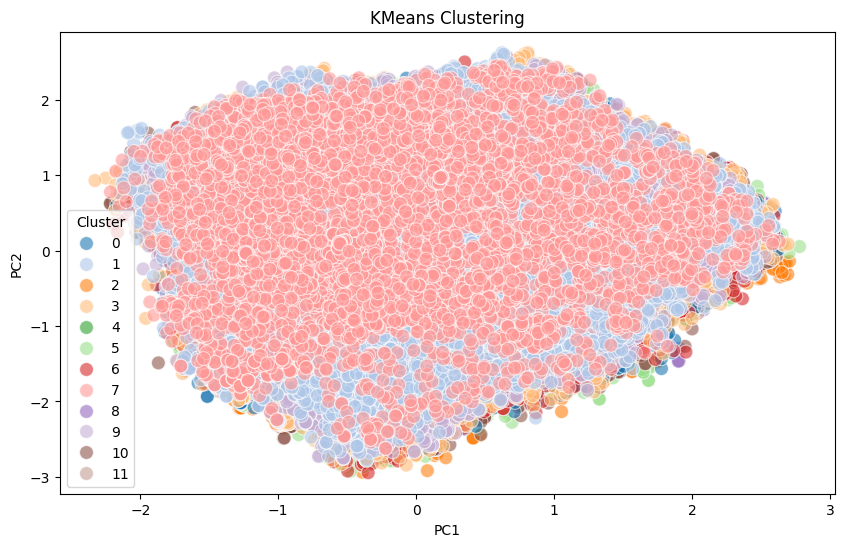

In [65]:
k = 12


# [Apply KMeans clustering]
kmeans = KMeans(n_clusters=k, random_state=42)

articles_kmeans_df_scaled['article_id'] = articles['article_id']
articles_kmeans_df_scaled['article_Cluster_id_kmeans'] = kmeans.fit_predict(articles_kmeans_df_scaled)

# Print cluster centers and labels
# print(f"Cluster Centers: {kmeans.cluster_centers_}\n")
# print(f"Cluster Labels: {kmeans.labels_}")
display(articles_kmeans_df_scaled.head(10))
articles_kmeans_df_scaled['article_Cluster_id_kmeans'].value_counts()
articles_kmeans_df_scaled['article_Cluster_id_kmeans'].count()

# [Visualization]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=articles_kmeans_df_scaled['PC1'],
    y=articles_kmeans_df_scaled['PC2'],
    hue=articles_kmeans_df_scaled['article_Cluster_id_kmeans'],
    # palette='viridis',
    palette='tab20',
    s=100,
    alpha=0.6
)
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


In [66]:

# df_article_cluster = articles_kmeans_df_scaled[['article_id', 'article_Cluster_id_kmeans']].copy()
# display(df_article_cluster)
display(articles_kmeans_df_scaled)



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,article_id,article_Cluster_id_kmeans
0,-0.932663,0.818286,-1.358735,-0.250075,1.553485,-0.769967,1.243594,2.689466,-0.986323,-0.774269,1.081579,-1.188801,-0.030162,-0.184371,1.083515,0.239447,0.478222,0.629008,-0.025228,-0.431947,-0.225013,-0.350904,1.890878,1.066906,-1.321264,-0.454675,-0.795465,1.192705,-0.202790,-0.016818,2.059160,0.093323,0.508795,1.887350,0.251576,1.352407,1.161897,0.107815,0.870674,-0.355678,0.586374,-0.567653,-0.642668,0.988409,0.342854,-0.428850,0.867373,0.645251,-0.607272,-0.454418,1.105658,108775015,4
1,-0.917306,0.841407,-1.367519,-0.267229,1.549100,-0.775138,1.174846,2.711613,-1.013065,-0.750159,1.200727,-1.105671,-0.174075,0.107852,0.674085,0.238999,0.624230,0.493437,0.069725,-0.543724,-0.162820,-0.189556,1.877378,1.149557,-1.383748,-0.370142,-0.803304,1.284690,0.351598,0.125879,1.783358,0.097034,0.945263,1.771554,0.253371,1.380498,1.140374,0.343900,0.942993,-0.266107,0.499285,-0.615508,-0.541974,1.067220,0.365194,-0.455293,0.924609,0.689926,-0.586226,-0.479158,1.098283,108775044,4
2,-0.909622,0.838531,-1.343082,-0.294401,1.595510,-0.837560,1.132452,2.751925,-0.952499,-0.673928,1.267109,-0.923311,-0.158918,0.243696,0.238766,0.166532,0.849968,0.212236,-0.406912,-0.477707,0.383772,0.170429,1.881803,1.171243,-1.666706,-0.153270,-1.037805,1.496701,0.708431,0.154600,1.576524,-0.093207,1.261293,1.854180,0.223059,1.397732,1.069239,0.559292,0.955005,-0.152963,0.349687,-0.676104,-0.348078,1.134040,0.400691,-0.477094,0.966575,0.719137,-0.565953,-0.494253,1.091786,108775051,4
3,-1.264510,0.298967,-1.514108,-0.171002,2.156642,-0.613053,2.192897,1.490018,0.177826,-1.085177,0.336327,-0.568678,-1.635794,0.411896,1.386193,-0.045519,0.740638,0.690195,0.438952,-0.641814,-0.441380,0.158102,1.541749,0.820233,-0.626279,-0.185718,-0.739988,1.461161,-0.642145,0.491677,-0.542227,-0.242781,-1.348496,1.847700,1.741003,-0.729584,0.094933,0.571195,0.137134,-0.786500,-1.270741,-1.929651,2.031565,-2.904297,0.808245,2.012581,-0.418238,0.016568,-1.030264,-0.455587,-0.369596,110065001,4
4,-1.249153,0.322087,-1.522892,-0.188155,2.152257,-0.618224,2.124149,1.512166,0.151084,-1.061067,0.455475,-0.485549,-1.779707,0.704119,0.976763,-0.045968,0.886646,0.554624,0.533904,-0.753591,-0.379186,0.319450,1.528250,0.902884,-0.688763,-0.101185,-0.747827,1.553147,-0.087757,0.634374,-0.818029,-0.239071,-0.912029,1.731904,1.742797,-0.701494,0.073410,0.807281,0.209453,-0.696929,-1.357830,-1.977506,2.132259,-2.825486,0.830585,1.986139,-0.361002,0.061243,-1.009217,-0.480327,-0.376972,110065002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0.457517,-0.668656,-0.729176,0.187318,1.110193,-0.829635,-1.637294,-1.606115,2.313166,-0.079979,2.164558,-0.383067,-1.605687,-0.377360,0.295576,1.074490,-0.277763,-0.806473,0.315771,1.502559,-0.594680,0.484502,-0.852460,-1.150388,1.960559,-0.467812,-0.002976,0.532286,-2.331427,0.330392,-0.267036,-0.834401,-0.387267,0.721422,-1.291247,0.877370,0.434575,0.474190,0.853955,0.157623,-0.447635,-0.201042,-0.126669,0.529681,-0.755473,1.639652,1.402331,0.608338,-0.421730,-0.672629,-0.915239,953450001,7
105538,0.298139,1.104028,0.563141,-1.170590,-0.167854,0.323157,-0.253837,-0.110948,-1.687970,-1.058949,-0.439667,0.905581,-0.966669,-1.115269,0.197903,-0.164088,0.483647,1.337866,-0.077786,1.644300,0.302912,3.511815,-0.341735,-0.788273,0.703091,-0.545516,1.226141,-0.710428,-1.299154,0.759770,0.847050,1.654736,-0.531498,-0.238287,-0.528412,0.945225,0.334251,-0.496802,0.475420,0.142225,-0.166477,-0.414475,-1.014459,1.476673,1.493357,1.169701,0.814394,1.284789,-3.358250,1.727758,0.799803,953763001,7
105539,-0.5

In [67]:
a1 = articles_kmeans_df_scaled.copy()
a2 = customers[['customer_id', 'fashion_news_frequency', 'age', 'club_member_status_ACTIVE']].copy()
a3 = transactions[['customer_id', 'article_id', 'price', 'sales_channel_id']].copy()


df = a3.merge(a1, on='article_id', how='left')
df = df.merge(a2, on='customer_id', how='left')

display(df)


,customer_id,article_id,price,sales_channel_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,article_Cluster_id_kmeans,fashion_news_frequency,age,club_member_status_ACTIVE
0,00282135561702f5b3b750fa3382d8fd83ce5d761a507e...,838780005,0.011847,1,0.565948,0.084730,0.436884,0.691778,-1.309963,-1.132522,1.754029,-1.372063,-1.092493,-0.773456,0.608853,0.568295,-0.953630,0.776110,-0.425115,-1.751739,-0.164416,-0.077165,0.715340,2.014053,-0.115800,2.216357,0.378236,1.226262,0.822693,-0.127452,0.832325,-0.075235,-1.001110,-0.154859,-0.585527,0.607266,-0.414803,1.061968,-0.412185,-0.304634,0.549320,-0.379169,0.536830,1.856882,-0.493686,1.129044,1.913455,-0.458687,0.000751,0.174053,-1.346190,0.185391,-0.506979,0.440369,-0.143525,1,2,55.0,True
1,00282135561702f5b3b750fa3382d8fd83ce5d761a507e...,790686007,0.013542,1,0.511792,0.296242,0.178422,1.479326,-0.561414,-1.653876,0.837964,-0.075836,-0.718481,-0.273364,-1.352949,-1.107218,1.194787,-0.745025,0.056276,-1.210784,-1.528939,-0.842399,0.129940,2.182411,0.033134,2.533157,0.194669,-0.656384,0.216160,-1.863129,1.651618,-0.767035,-0.051646,-0.250174,0.633182,-0.719286,0.903678,0.447108,-0.997036,1.109660,1.352974,0.361064,-1.341849,-0.559373,-0.208923,-0.977778,-0.498886,0.399646,-0.389117,-0.906069,0.288301,-1.312845,-0.890077,0.800876,-0.986452,9,2,55.0,True
2,014c49684e32237321bc10aed8feb04a7259d079c4cd89...,739659039,0.004610,1,0.361831,-0.658907,-0.387002,3.297757,-0.432365,1.646575,0.043118,1.195246,0.869851,0.980474,-2.057525,0.257320,-1.685854,-0.273308,2.183879,0.644217,0.089767,0.389653,0.396188,-0.908999,0.137076,-0.856536,0.710671,0.707025,0.807885,-1.906320,-0.715787,-0.075281,-0.908882,-0.211431,-1.815734,-0.331847,-1.033827,-1.608752,0.212740,0.023436,0.629078,-2.234946,0.721000,-0.304639,0.254002,0.951651,-1.151324,0.392146,0.768666,-0.704056,1.303180,-0.112852,-1.292779,0.288289,-0.350011,3,0,63.0,True
3,014c49684e32237321bc10aed8feb04a7259d079c4cd89...,872971006,0.015424,1,1.356143,-0.667095,-0.830713,1.353974,-0.863338,-1.096702,0.751802,-0.040433,-1.133338,-0.254637,0.179870,1.007275,-1.127722,-1.431361,3.083920,0.175249,-0.209493,-0.668755,-1.018211,-1.403531,-0.024373,-1.195380,0.120923,0.094846,1.830882,-1.227386,-0.407844,-2.855112,-1.207957,1.283700,-1.156414,-0.459840,-0.094809,-0.475727,1.049843,0.004273,0.051487,-0.539689,0.874534,0.437340,-0.127911,-0.292996,0.899072,-0.592910,-0.693711,1.827226,-1.013079,-0.722513,0.862020,0.872704,-0.945499,1,0,63.0,True
4,014c49684e32237321bc10aed8feb04a7259d079c4cd89...,814299003,0.015424,1,1.650823,-0.259766,-0.387111,1.148655,-0.099320,-0.289348,-0.303455,1.159838,-1.185326,2.147246,0.413557,-0.194970,0.863074,2.751634,-0.738346,-0.313565,-0.761288,-0.968614,-0.543403,0.091631,0.295426,0.364242,-0.351482,0.422667,0.616013,0.583193,-1.565593,-1.205767,-0.652303,1.173232,-1.345961,0.106441,0.044322,-0.203060,-0.980834,-0.257659,0.946630,-0.971351,0.655759,-0.532829,-0.356030,-0.267101,0.172472,0.762096,1.145437,0.782682,0.125913,-0.597534,-0.787781,2.222355,1.132301,9,0,63.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75222,fd02a12cfc04d7090e3853b4aa5618991f8d925c1d4773...,872618002,0.016271,1,0.255304,-0.323984,-0.047664,0.494784,1.622553,-0.032306,-1.531237,-0.360710,-0.065412,-1.194577,-0.416076,0.294951,-0.211669,0.071720,-1.222540,-1.661690,-0.030516,0.892173,-1.461607,0.696380,0.734091,0.649890,0.885071,0.672407,0.777757,0.743051,-0.355940,-1.388397,-1.356775,-1.731299,0.296687,1.797797,-1.592426,-0.269798,-0.596105,-1.249305,0.863584,1.436453,-0.483483,0.819548,0.174208,-1.578222,0.453303,1.216617,-0.057735,0.663635,0.172814,

In [68]:
df.columns

Index(['customer_id', 'article_id', 'price', 'sales_channel_id', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
       'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21',
       'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
       'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39',
       'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48',
       'PC49', 'PC50', 'PC51', 'article_Cluster_id_kmeans',
       'fashion_news_frequency', 'age', 'club_member_status_ACTIVE'],
      dtype='object')

In [69]:
df_val = df.copy()

train_df, test_df = train_test_split(df_val, test_size=0.1, random_state=42)

train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

print(f"Train size: {train_df.shape}, Test size: {test_df.shape}")

Train size: (67704, 59), Test size: (7523, 59)


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Update k_range to evaluate every 5 steps
k_range = range(1, 101, 5)

# Initialize lists for storing metrics
wcss = []
silhouette_scores = []

# K-Means Clustering
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X_train_scaled)

    wcss.append(km.inertia_)  # Append WCSS (inertia)

    # Silhouette Score is only meaningful for k > 1
    if k > 1:
        labels = km.labels_
        silhouette_avg = silhouette_score(X_train_scaled, labels)
        silhouette_scores.append(silhouette_avg)

        print(f"k = {k}, WCSS = {km.inertia_}, Silhouette Score = {silhouette_avg}")
    else:
        silhouette_scores.append(None)  # Append None for k = 1
        print(f"k = {k}, WCSS = {km.inertia_}, Silhouette Score = N/A")

# Plot the results
plt.figure(figsize=(14, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


k = 1, WCSS = 3859127.999999982, Silhouette Score = N/A


KeyboardInterrupt: 

In [72]:
features = [
    'price', 'sales_channel_id', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
       'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21',
       'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
       'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39',
       'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48',
       'PC49', 'PC50', 'PC51', 'article_Cluster_id_kmeans',
       'fashion_news_frequency', 'age', 'club_member_status_ACTIVE'
]

# X_train = df[features]

X_train = train_df[features]
X_test = test_df[features]

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

wcss = []
silhouette_scores = []
k_range = range(90, 100)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X_train_scaled)

    wcss.append(km.inertia_)

    if k > 1:
        labels = km.labels_
        silhouette_avg = silhouette_score(X_train_scaled, labels)
        silhouette_scores.append(silhouette_avg)

    print(f"k = {k}, WCSS = {km.inertia_}, Silhouette Score = {silhouette_avg if k > 1 else 'N/A'}")


plt.figure(figsize=(14, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(90, 100))

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range[0:10], silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(90, 100))

plt.tight_layout()
plt.show()


optimal_k_elbow = np.argmin(np.diff(wcss, 2)) + 1
optimal_k_silhouette = k_range[np.argmax(silhouette_scores) + 1]
print(f"Optimal k (Elbow Method): {optimal_k_elbow}")
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}")


In [73]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

print(f"Train size: {train_df.shape}, Test size: {test_df.shape}")

Train size: (67704, 59), Test size: (7523, 59)


In [74]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
X_test_scaled = scaler.transform(test_df[features])

# Train KMeans model
optimal_k = 98
km = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=0)
km.fit(X_train_scaled)

train_df['cluster'] = km.labels_
test_df['cluster'] = km.predict(X_test_scaled)

def get_recommendations(customer_id, test_df, train_df, top_n=12):
    customer_cluster = test_df.loc[test_df['customer_id'] == customer_id, 'cluster'].values[0]

    cluster_articles = train_df[train_df['cluster'] == customer_cluster]

    recommendations = cluster_articles['article_id'].value_counts().head(top_n).index.tolist()

    return recommendations


In [75]:
test_customer_id = test_df['customer_id'].iloc[1]
customer_cluster = test_df.loc[test_df['customer_id'] == test_customer_id, 'cluster'].values[0]
total_clusters = len(test_df['cluster'].unique())
recommendations = get_recommendations(test_customer_id, test_df, train_df)


print(f"customer_id: {test_customer_id}")
print(f"belongs to cluster {customer_cluster} out of {total_clusters} clusters.")
print(f"Recommendations:")
for i, rec in enumerate(recommendations, start=1):
    print(f"Top {i} article_id: {rec}")

customer_id: c1c08f3ee5ac4185ebc3c6d130f707d48040d97563b94ac92fea7df03a0fe9d9
belongs to cluster 16 out of 98 clusters.
Recommendations:
Top 1 article_id: 914441004
Top 2 article_id: 881111001
Top 3 article_id: 905365001
Top 4 article_id: 914441001
Top 5 article_id: 914441005
Top 6 article_id: 905365006
Top 7 article_id: 573085043
Top 8 article_id: 867969003
Top 9 article_id: 882900007
Top 10 article_id: 920829003
Top 11 article_id: 881244001
Top 12 article_id: 898596007


In [76]:
test_df.head()

,customer_id,article_id,price,sales_channel_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,article_Cluster_id_kmeans,fashion_news_frequency,age,club_member_status_ACTIVE,cluster
22629,28c8758734b1a2d611f3ea350fa5239a68ed53f2e3313f...,816166004,0.027102,1,-0.934085,1.881158,0.811974,1.141561,-0.606927,0.976754,0.946971,-0.352868,-0.067898,-1.540768,0.450025,-0.853321,-0.490105,-1.013941,-1.011654,-1.166384,1.083801,-0.512448,0.609506,0.756709,0.954790,0.226861,-0.214826,-0.594501,0.636267,0.194600,0.870954,-0.437394,-1.977435,1.688773,1.198122,2.260433,-0.012659,0.258037,-2.083022,-0.988913,0.022841,0.225712,-0.316310,0.781822,-0.202309,1.588549,-0.743291,1.173143,0.042085,0.346417,-0.677160,-0.567333,-0.842167,0.619247,-0.602043,9,0,23.0,True,52
28216,c1c08f3ee5ac4185ebc3c6d130f707d48040d97563b94a...,898596005,0.012407,1,-1.490991,-1.435678,2.515885,-1.015465,0.320123,-2.019043,-0.557774,0.879329,0.017361,0.413567,-1.050444,0.885763,0.911588,0.077753,0.323242,-0.304111,0.659421,-0.848103,-1.580026,0.053309,0.368259,-0.224981,0.698934,0.086042,1.155568,-1.281006,0.820057,-0.186922,-0.205679,1.355346,0.082253,0.619604,0.530893,-0.125794,-0.015967,0.979505,-0.600294,0.591351,0.741971,-0.527924,0.286510,0.481587,-0.211936,0.040994,0.087161,-0.011297,0.666533,0.599279,-0.234839,0.849960,-0.328914,7,2,63.0,True,16
66499,2c560eb536d7b73a7d1f7142173ef71abec311f9a4df53...,900279002,0.042356,2,-1.033879,1.382022,0.978766,2.141838,-0.367994,0.642775,-1.079302,1.480360,0.491624,-0.185861,-0.813841,-1.130809,-1.276160,-0.954212,-0.479308,-0.182304,-1.057285,-0.463223,-0.510996,-0.990313,-0.368069,-0.715535,-1.243132,-0.452397,0.522755,-0.733634,2.638862,-1.134692,1.438882,2.033553,-0.152009,1.074236,2.581347,0.949601,-1.141557,-1.754555,-1.073427,0.622733,-0.240385,-0.019219,0.331258,-2.131481,1.040499,-0.448638,-0.290499,-0.360253,-0.590430,1.186921,0.174236,0.665641,-0.027188,7,0,48.0,True,15
33587,5ea29d12487c890c8fee346851bf5c60b5c8fb3bc2fe3c...,763275001,0.008458,1,0.770075,0.292518,-0.586836,1.565617,-0.283160,-1.735025,-0.177125,0.164564,-1.286603,-0.060521,0.795452,-0.259025,-0.759332,-0.505484,-0.040834,0.987647,-0.133937,-0.646615,-1.191235,-1.667856,-0.059583,1.176912,0.097273,0.189877,-0.641514,-1.620304,1.624607,-1.807750,0.867426,0.071675,1.194449,-0.527029,-1.252188,-0.107925,0.208544,0.535833,0.447764,1.365290,-0.996616,0.127388,-1.559562,0.555077,1.013869,-1.782926,-1.288489,1.628491,-1.003097,-0.497770,1.549809,-0.120280,-0.047809,3,0,24.0,True,21
33090,fbba1ad26b45b5c097c48aa7047d2c27df0e6a19ad1330...,814817001,0.033881,2,-0.472600,1.535178,0.747827,1.377857,-0.027922,1.586721,0.151932,0.279713,0.742799,-0.127669,-1.615875,1.581437,-0.234475,-1.203108,-0.883059,-1.716570,-0.113876,-1.339471,-0.068380,-0.767980,-2.280756,1.415910,-2.041204,0.571075,-0.364212,-0.109636,-0.190077,1.206384,-1.718003,-0.003648,1.101543,0.304898,-0.874850,-1.354449,0.380469,1.777276,-1.205434,-1.349870,0.307292,-0.059420,-1.134750,-0.222865,0.310933,0.208860,0.378689,-0.000289,-0.136270,-0.070234,0.367782,0.469546,-0.362589,9,0,51.0,True,47


In [77]:
train_df.head()

,customer_id,article_id,price,sales_channel_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,article_Cluster_id_kmeans,fashion_news_frequency,age,club_member_status_ACTIVE,cluster
67815,d9b88776254666363b9d2bbe56c85ae1db0109a177e821...,916497001,0.022017,2,-0.387057,0.002786,1.169898,0.134028,0.491660,1.605682,-1.480200,0.927437,-1.628864,-0.427507,0.814961,0.774502,-2.186640,-0.268357,0.349547,1.056921,-1.131061,-0.601875,-2.071971,2.821372,-1.086774,-0.855268,1.047378,-1.156538,-0.958303,0.183358,0.532147,-1.660466,0.796191,-1.000880,-0.585122,0.428042,-0.698783,-0.175999,1.020145,1.847023,-0.003191,-2.422012,0.071293,-0.702937,-0.278369,0.535537,-0.470657,-1.436046,-0.171013,-0.326381,0.888169,-2.911753,-0.475632,-0.617943,-0.504299,7,0,49.0,True,77
13655,ea84c220ec39eff9ec685f71eebf5d573f085014e754e3...,868405004,0.016932,1,0.810970,-0.530366,0.329716,0.378206,-0.713650,-1.496227,0.430503,1.491436,-0.585011,-0.338492,-1.842422,1.442257,0.132944,-1.668472,-1.040738,2.651136,0.753921,1.236604,0.591087,1.463513,-1.173211,2.137226,-0.928023,-0.964892,1.145476,1.696177,0.120553,0.251256,-1.105457,2.079450,1.156407,0.719116,-0.398058,0.083644,-0.628616,2.231890,-0.686019,0.245975,0.244096,0.491927,2.740408,1.578120,0.294498,-1.237453,-0.758303,-2.329791,2.197477,-1.483296,0.810370,0.231390,0.195093,1,2,23.0,True,63
67267,969f97202aca11383f32df084274120392262aedd294d0...,906305001,0.033881,2,0.340524,1.814961,0.149968,-0.318079,0.890779,-1.189807,-2.253108,-0.335158,0.863219,0.368342,1.435804,-0.001650,0.251265,-0.223641,-0.563103,1.642769,-0.744922,-1.659209,-0.187881,0.133120,1.506247,0.235173,-0.712943,-0.148309,0.601983,-0.944417,0.945358,-0.219703,-0.759998,-0.055640,-0.383705,-1.368019,0.654499,-0.852163,-0.980229,0.874262,0.819509,0.788850,0.280483,-0.918864,-0.785289,0.349076,0.837039,-0.789308,1.503953,0.541217,-0.332915,-0.165753,-0.222224,1.020877,0.402492,7,2,30.0,True,80
8378,bf86e70fa996cb886d413400b4b192bac8709f7131d01c...,887904003,0.050831,2,-1.745605,-0.746662,2.098870,-0.280104,-0.133303,-0.358718,-1.226579,0.928199,-0.379108,0.315480,0.301113,1.221314,-0.166424,1.305691,-0.110702,0.444598,0.413854,-0.429569,-0.649405,-0.408971,0.151094,0.906920,-0.500277,0.061352,0.827882,-2.066280,-0.244202,0.179747,0.549177,-0.220935,-0.000261,0.228411,0.659462,1.912111,-0.253881,-2.149531,-0.923234,-1.514975,1.671507,0.553602,-1.809819,-1.114240,0.989555,-0.579471,0.388542,-0.100192,-0.584944,0.295549,-0.951777,0.540273,1.379087,7,0,25.0,True,90
37934,398f6d6aebd32253ff8d266af4cfbdee0beb206a94553d...,866731001,0.025407,1,0.253100,-0.790776,0.621357,0.367116,0.027611,1.428624,-0.620318,0.867083,0.007582,-0.585911,-0.627828,0.587162,-0.782819,-0.754443,0.397350,4.178984,-1.935089,0.506287,0.297755,0.753647,0.496241,1.290606,-3.083372,1.610974,0.109835,0.765172,-0.160867,-0.537066,-0.725829,-0.900233,-0.622261,0.531482,-0.165287,1.895475,-0.547515,-0.629101,0.745886,0.330116,0.767042,0.625997,-0.404328,-1.655373,-0.014840,-0.712746,-0.806301,0.154560,-0.065952,-0.974404,-0.954005,0.622417,1.721052,1,2,29.0,True,71


In [121]:
test = pd.read_csv('/content/drive/MyDrive/CS 7641 Machine Learning Group Project/test6.csv')
df1 = pd.concat([train_df,test_df], ignore_index=True)
test_df =  df1[df1['customer_id'].isin(test['customer_id'])]

In [123]:
test_dataset = test_df['customer_id'].drop_duplicates()

In [124]:
from tqdm import tqdm  # For the progress bar


results = []


for customer_id in tqdm(test_dataset, desc="Processing Customers"):

    customer_cluster = test_df.loc[test_df['customer_id'] == customer_id, 'cluster'].values[0]

    recommendations = get_recommendations(customer_id, test_df, train_df, top_n=12)

    customer_data = {
        "test_customer_id": customer_id,
        "customer_cluster": customer_cluster,
    }

    for i in range(12):
        customer_data[f"recommendations_{i+1}"] = recommendations[i] if i < len(recommendations) else None

    results.append(customer_data)

result_rec = pd.DataFrame(results)
display(result_rec.head())

Processing Customers: 100%|██████████| 4946/4946 [01:23<00:00, 59.39it/s]


,test_customer_id,customer_cluster,recommendations_1,recommendations_2,recommendations_3,recommendations_4,recommendations_5,recommendations_6,recommendations_7,recommendations_8,recommendations_9,recommendations_10,recommendations_11,recommendations_12
0,bf86e70fa996cb886d413400b4b192bac8709f7131d01c...,90,861514001,928040002,928040001,832253002,779781013,895610003,896064001,832253003,896064002,928907001,895610005,862325002
1,398f6d6aebd32253ff8d266af4cfbdee0beb206a94553d...,71,918292001,866731001,918292004,905957001,918292011,915292001,866731003,866244003,905957007,810838010,822115004,915292002
2,95ec8e483bf7136e19ccfd50d529bab0c7693569497c15...,82,599580038,599580047,868018001,599580072,779725006,599580044,865595003,599580061,865699001,351484039,811927002,158340001
3,c031a62e1470f6c399b6f40bf07d7eafbfba6411c5debe...,82,599580038,599580047,868018001,599580072,779725006,599580044,865595003,599580061,865699001,351484039,811927002,158340001
4,ffc2e7c210e3ea602e6d229116773cc0588c929f8cc70b...,26,921906003,906794003,921906002,936610001,915523001,817361007,797078018,921906001,912095007,817361008,927491001,892850002


In [127]:
df_result = test_df[test_df['customer_id'].isin(test_dataset)].copy()

df_result = df_result.merge(result_rec, left_on='customer_id', right_on='test_customer_id', how='left')

In [128]:
display(df_result)

,customer_id,article_id,price,sales_channel_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,article_Cluster_id_kmeans,fashion_news_frequency,age,club_member_status_ACTIVE,cluster,test_customer_id,customer_cluster,recommendations_1,recommendations_2,recommendations_3,recommendations_4,recommendations_5,recommendations_6,recommendations_7,recommendations_8,recommendations_9,recommendations_10,recommendations_11,recommendations_12
0,bf86e70fa996cb886d413400b4b192bac8709f7131d01c...,887904003,0.050831,2,-1.745605,-0.746662,2.098870,-0.280104,-0.133303,-0.358718,-1.226579,0.928199,-0.379108,0.315480,0.301113,1.221314,-0.166424,1.305691,-0.110702,0.444598,0.413854,-0.429569,-0.649405,-0.408971,0.151094,0.906920,-0.500277,0.061352,0.827882,-2.066280,-0.244202,0.179747,0.549177,-0.220935,-0.000261,0.228411,0.659462,1.912111,-0.253881,-2.149531,-0.923234,-1.514975,1.671507,0.553602,-1.809819,-1.114240,0.989555,-0.579471,0.388542,-0.100192,-0.584944,0.295549,-0.951777,0.540273,1.379087,7,0,25.0,True,90,bf86e70fa996cb886d413400b4b192bac8709f7131d01c...,90,861514001,928040002,928040001,832253002,779781013,895610003,896064001,832253003,896064002,928907001,895610005,862325002
1,398f6d6aebd32253ff8d266af4cfbdee0beb206a94553d...,866731001,0.025407,1,0.253100,-0.790776,0.621357,0.367116,0.027611,1.428624,-0.620318,0.867083,0.007582,-0.585911,-0.627828,0.587162,-0.782819,-0.754443,0.397350,4.178984,-1.935089,0.506287,0.297755,0.753647,0.496241,1.290606,-3.083372,1.610974,0.109835,0.765172,-0.160867,-0.537066,-0.725829,-0.900233,-0.622261,0.531482,-0.165287,1.895475,-0.547515,-0.629101,0.745886,0.330116,0.767042,0.625997,-0.404328,-1.655373,-0.014840,-0.712746,-0.806301,0.154560,-0.065952,-0.974404,-0.954005,0.622417,1.721052,1,2,29.0,True,71,398f6d6aebd32253ff8d266af4cfbdee0beb206a94553d...,71,918292001,866731001,918292004,905957001,918292011,915292001,866731003,866244003,905957007,810838010,822115004,915292002
2,95ec8e483bf7136e19ccfd50d529bab0c7693569497c15...,599580049,0.015237,2,-0.985447,-0.750706,-1.157035,-0.031903,0.481173,0.619302,-0.400332,-2.394426,-0.325812,0.549433,-1.498892,-0.210924,0.941948,0.026613,0.981131,0.691202,-0.088395,1.596312,-1.131102,-0.184791,0.071278,-0.289389,1.716439,0.128538,0.818128,0.355619,-1.839857,0.734710,0.620271,0.057722,-0.090185,1.711686,0.673487,-0.823778,-1.125387,0.630439,-0.649130,-0.160663,-2.015393,-1.792919,-0.337223,0.397567,-0.827463,0.088849,0.599119,-0.683168,-3.962804,-0.246272,-0.499566,1.044840,0.965392,10,2,61.0,True,82,95ec8e483bf7136e19ccfd50d529bab0c7693569497c15...,82,599580038,599580047,868018001,599580072,779725006,599580044,865595003,599580061,865699001,351484039,811927002,158340001
3,c031a62e1470f6c399b6f40bf07d7eafbfba6411c5debe...,866261001,0.016932,2,-1.082003,-0.642935,-1.118434,-0.323791,0.377283,0.417415,-0.680058,-2.052338,-0.413624,0.669526,-1.445315,0.524918,-0.080989,0.523824,-0.560308,0.753513,-1.182869,0.935702,-0.914419,-0.137477,-0.610610,0.212050,1.620140,0.608912,2.419304,0.114279,-0.758566,-0.095484,2.135546,0.578958,-0.722846,1.655947,2.191611,-1.397495,-0.628123,1.249432,-0.188624,0.635109,-1.287319,-0.859726,-0.397914,-0.456205,0.441694,1.143743,0.932171,-0.255289,-3.561328,-0.146718,-0.146849,1.069703,0.662345,1,2,27.0,True,82,c031a62e1470f6c399b6f40bf07d7eafbfba6411c5debe...,82,599580038,599580047,868018001,599580072,779725006,599580044,865595003,599580061,865699001,351484039,811927002,158340001
4,ffc2e7c210e3ea602e6d229116773cc0588c929f8cc70b...,797078018,0.033881,2,-0.689944,1.069111,1.353657,0.878296,-0.897589,0.151918,0.956659,-1.211133,1.561532,-0.300601,-0.076040,-0.138180,-1.013246,1.657372,-1.029294,-1.140782,-0.534644,-2.655367,-0.999820,-0.958834,0.049513,-0.746563,0.353003,0.994548,0.870787,2.570538,0.202790,0.476792,0.120749,0.473474,1.130875,-0.372

In [129]:
df_result_clean = df_result[['customer_id', 'article_id', 'customer_cluster', 'article_Cluster_id_kmeans',
                             'recommendations_1', 'recommendations_2', 'recommendations_3',
                             'recommendations_4', 'recommendations_5', 'recommendations_6',
                             'recommendations_7', 'recommendations_8', 'recommendations_9',
                             'recommendations_10', 'recommendations_11', 'recommendations_12']].copy()

display(df_result_clean)
df_result_clean.to_csv("/content/drive/MyDrive/CS 7641 Machine Learning Group Project/recommendations_results_6.csv", index=True)

,customer_id,article_id,customer_cluster,article_Cluster_id_kmeans,recommendations_1,recommendations_2,recommendations_3,recommendations_4,recommendations_5,recommendations_6,recommendations_7,recommendations_8,recommendations_9,recommendations_10,recommendations_11,recommendations_12
0,bf86e70fa996cb886d413400b4b192bac8709f7131d01c...,887904003,90,7,861514001,928040002,928040001,832253002,779781013,895610003,896064001,832253003,896064002,928907001,895610005,862325002
1,398f6d6aebd32253ff8d266af4cfbdee0beb206a94553d...,866731001,71,1,918292001,866731001,918292004,905957001,918292011,915292001,866731003,866244003,905957007,810838010,822115004,915292002
2,95ec8e483bf7136e19ccfd50d529bab0c7693569497c15...,599580049,82,10,599580038,599580047,868018001,599580072,779725006,599580044,865595003,599580061,865699001,351484039,811927002,158340001
3,c031a62e1470f6c399b6f40bf07d7eafbfba6411c5debe...,866261001,82,1,599580038,599580047,868018001,599580072,779725006,599580044,865595003,599580061,865699001,351484039,811927002,158340001
4,ffc2e7c210e3ea602e6d229116773cc0588c929f8cc70b...,797078018,26,9,921906003,906794003,921906002,936610001,915523001,817361007,797078018,921906001,912095007,817361008,927491001,892850002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82157,903258056c235340b60876b4af2779fe1ed515cf10ece4...,915529001,0,7,372860002,372860001,575347003,683001020,608776002,912088001,372860024,783707110,807244017,807244005,631536028,915101002
82158,e3813a6978f687337c8c8c818eae1e4b90793693029c71...,639448001,91,10,904584009,904584008,904584007,904584002,639448001,794321011,728156025,794454002,865914001,794321007,904584001,914293003
82159,9307039b3fa537dc923f7a3c1b93dff869e49477f51d31...,707100003,33,6,918894001,902518003,907702002,902518007,903790001,917843001,768931002,850587004,890985001,918894002,904026002,679854001
82160,282ba4b915439d8f89b1222a15f9ad11595fdb8195d398...,562245102,55,5,673677002,863646005,918516001,863646004,863646001,863646003,863646002,879088001,874704002,864297004,805947001,673677022
